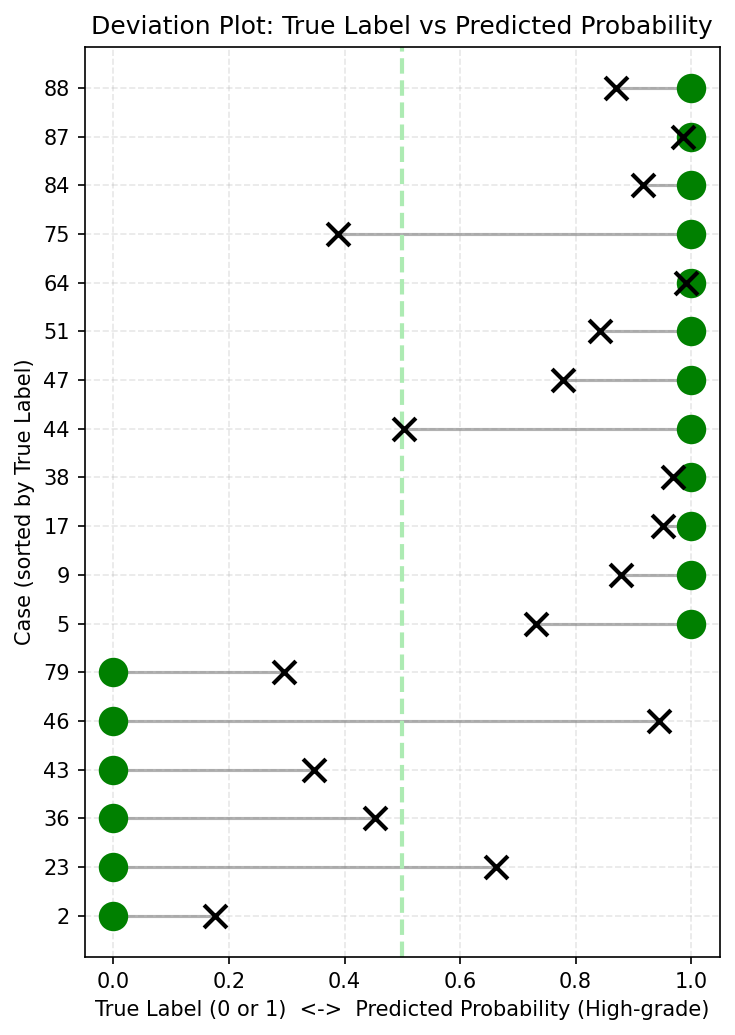

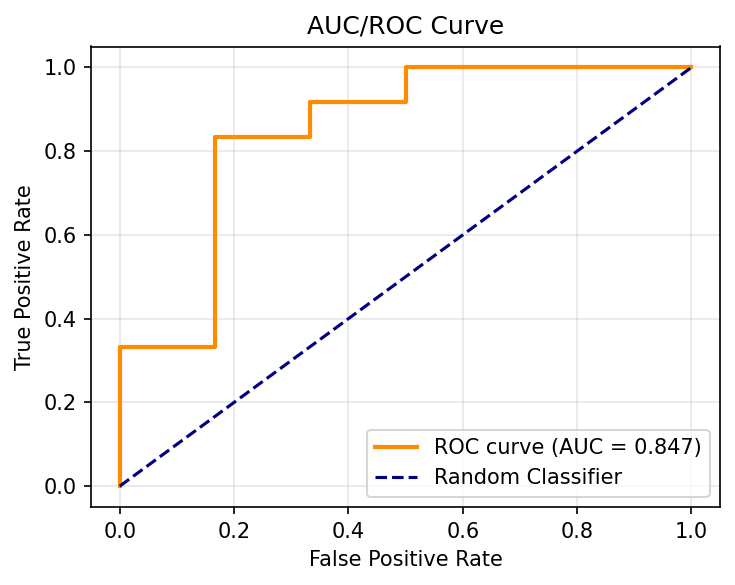


Computed AUC = 0.847


In [16]:
# =====================================================
# Combined Visualization Script
# - Green-dot deviation plot
# - AUC/ROC curve
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------------------------------
# Load predictions
# -----------------------------------------------------
df = pd.read_csv("/Users/JackYu_1/Downloads/predictions.csv")

# Sort so true=0 cases appear first (optional but cleaner)
df_sorted = df.sort_values(["true_label", "case_id"]).reset_index(drop=True)
df_sorted["case_str"] = df_sorted["case_id"].astype(str)

# -----------------------------------------------------
# 1. Deviation Plot (True vs Probabilities)
# -----------------------------------------------------
plt.figure(figsize=(5,7), dpi=150)

for i, row in df_sorted.iterrows():
    # connecting line
    plt.plot(
        [row["true_label"], row["prob_high_grade"]],
        [i, i],
        color="gray",
        alpha=0.6,
        linewidth=1.5
    )

    # true label = large green circle
    plt.scatter(
        row["true_label"], i,
        color="green",
        s=200,
        marker="o",
        edgecolor="black",
        linewidth=0,
        zorder=3
    )

    # predicted probability = small black X
    plt.scatter(
        row["prob_high_grade"], i,
        color="black",
        s=120,
        marker="x",
        linewidths=2,
        zorder=4
    )

plt.yticks(range(len(df_sorted)), df_sorted["case_str"])
plt.axvline(0.5, color="#ADEBB3", linestyle="--", linewidth=2, label="Decision Threshold (0.5)")
plt.xlabel("True Label (0 or 1)  <->  Predicted Probability (High-grade)")
plt.ylabel("Case (sorted by True Label)")
plt.title("Deviation Plot: True Label vs Predicted Probability")
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 2. AUC / ROC Curve
# -----------------------------------------------------
fpr, tpr, thresholds = roc_curve(df["true_label"], df["prob_high_grade"])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4), dpi=150)
plt.plot(
    fpr, tpr,
    color='darkorange',
    lw=2,
    label=f'ROC curve (AUC = {roc_auc:.3f})'
)
plt.plot(
    [0, 1], [0, 1],
    color='navy',
    lw=1.5,
    linestyle='--',
    label='Random Classifier'
)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC/ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nComputed AUC = {roc_auc:.3f}")